In [1]:
import h5py as h5
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import seaborn as sns
import legwork

import sys
sys.path.append("../src/")
from variations import variations
from galaxy import simulate_mw

%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 20

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

In [2]:
dco_colours = {"BHBH": plt.get_cmap("plasma")(0.2), 
               "BHNS": plt.get_cmap("plasma")(0.5),
               "NSNS": plt.get_cmap("plasma")(0.8)}

dco_types = ["BHBH", "BHNS", "NSNS"]
sim_folder = "../data/simulation_plus_channels/"

total_DCOs_in_MW = np.load("../data/total_DCO_in_MW.npy")
total_bound_DCOs_in_MW = np.load("../data/total_DCO_in_MW_nohubble.npy")

detections = np.load("../data/detections_4yr.npy")
detections_10yr = np.load("../data/detections_10yr.npy")

In [15]:
channels = [
    {
        "label": "other",
        "colour": "#808080"
    },
    {
        "label": "classic",
        "colour": "#118ab2"
    },
    {
        "label": "only stable",
        "colour": "#ef476f"
    },
    {
        "label": "single core CEE",
        "colour": "#ffd166"
    },
    {
        "label": "double core CEE",
        "colour": "#073b4c"
    },
]

In [3]:
def kdeplot_by_channel(variable, dco_type_list=["BHBH", "BHNS", "NSNS"], channels=[0, 1, 2, 3, 4], variation_index=0, show=True, fig=None, ax=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, figsize=(10, 5))

    for dco_type in dco_type_list:
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[variation_index]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = np.logical_and(full_data["snr"] > 7, np.isin(full_data["channel"], channels))

            data = full_data[mask]
            print(len(data))

        sns.kdeplot(data[variable], weights=data["weight"], color=dco_colours[dco_type], cut=0, **kwargs, ax=ax)

    if show:
        print("yo")
        plt.show()
    return fig, ax

In [6]:
with h5.File(sim_folder + "{}_{}_all.h5".format("BHNS", "fiducial"), "r") as f:
    full_data = f["simulation"][...].squeeze()
    mask = full_data["snr"] > 7

    data = full_data[mask]
#     _, places = np.unique(data["seed"], return_index=True)
#     data = data[places]
    
mBH = np.maximum(data["m_1"], data["m_2"])
mNS = np.minimum(data["m_1"], data["m_2"])

t_merge = legwork.evol.get_t_merge_ecc(ecc_i=data["e_DCO"], a_i=data["a_DCO"] * u.AU,
                                          m_1=data["m_1"] * u.Msun, m_2=data["m_2"] * u.Msun).to(u.Gyr)

0 71
1 20078
2 2441
3 129
4 17


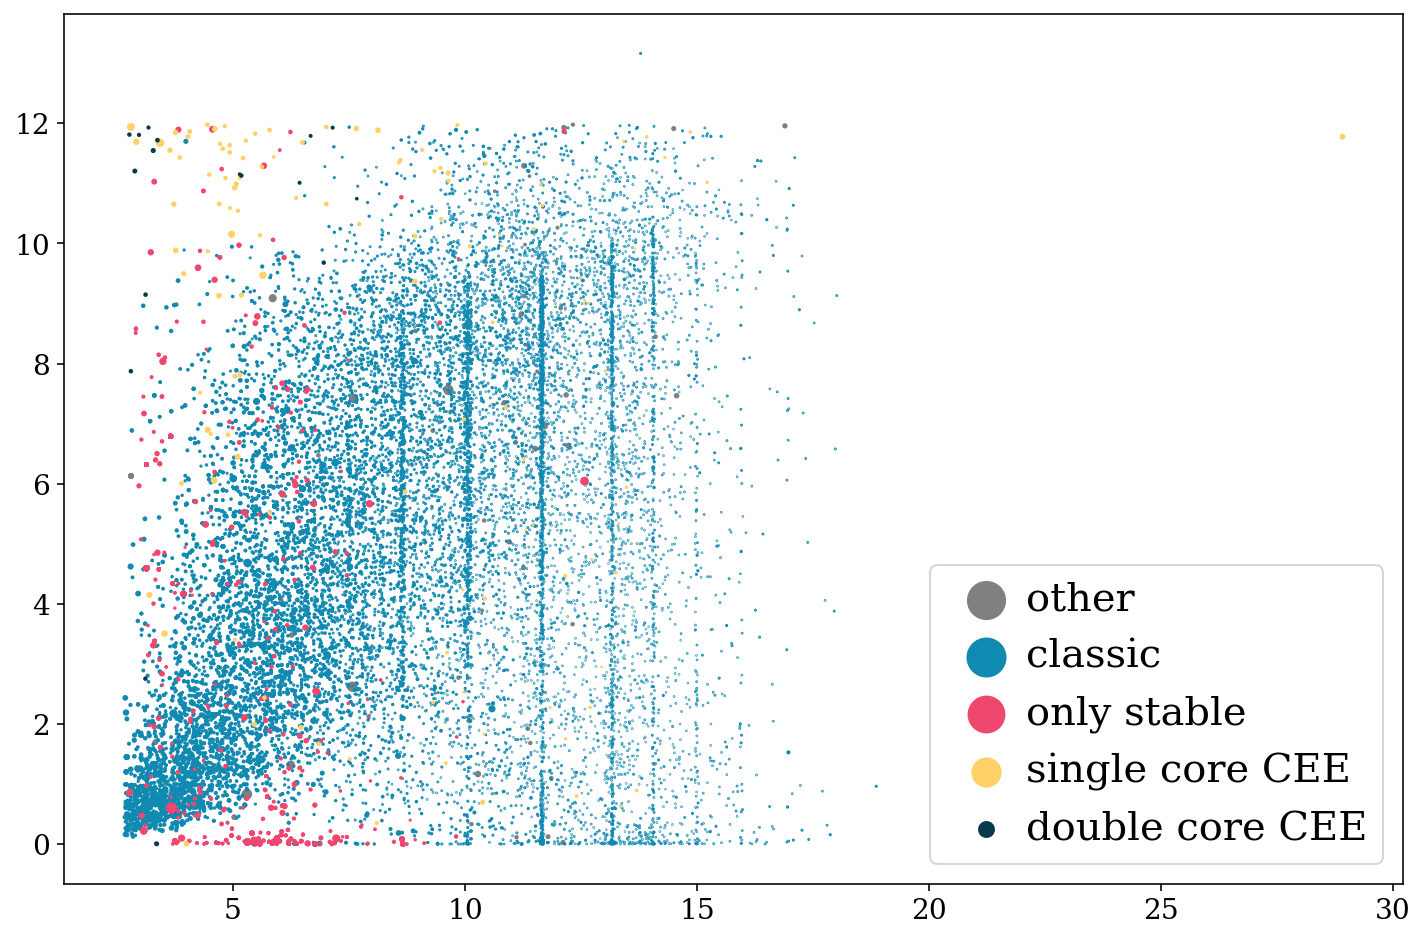

In [16]:
fig, ax = plt.subplots()
for i in range(len(channels)):

    ch_mask = data["channel"] == i
    print(i, len(mBH[ch_mask] / len(mBH)))
        
    ax.scatter(mBH[ch_mask], t_merge.value[ch_mask], s=25 * data["weight"][ch_mask],
               color=channels[i]["colour"], label=channels[i]["label"])
    
# ax.set_xscale("log")
# ax.set_yscale("log")

ax.legend(markerscale=6, handletextpad=0)

plt.show()

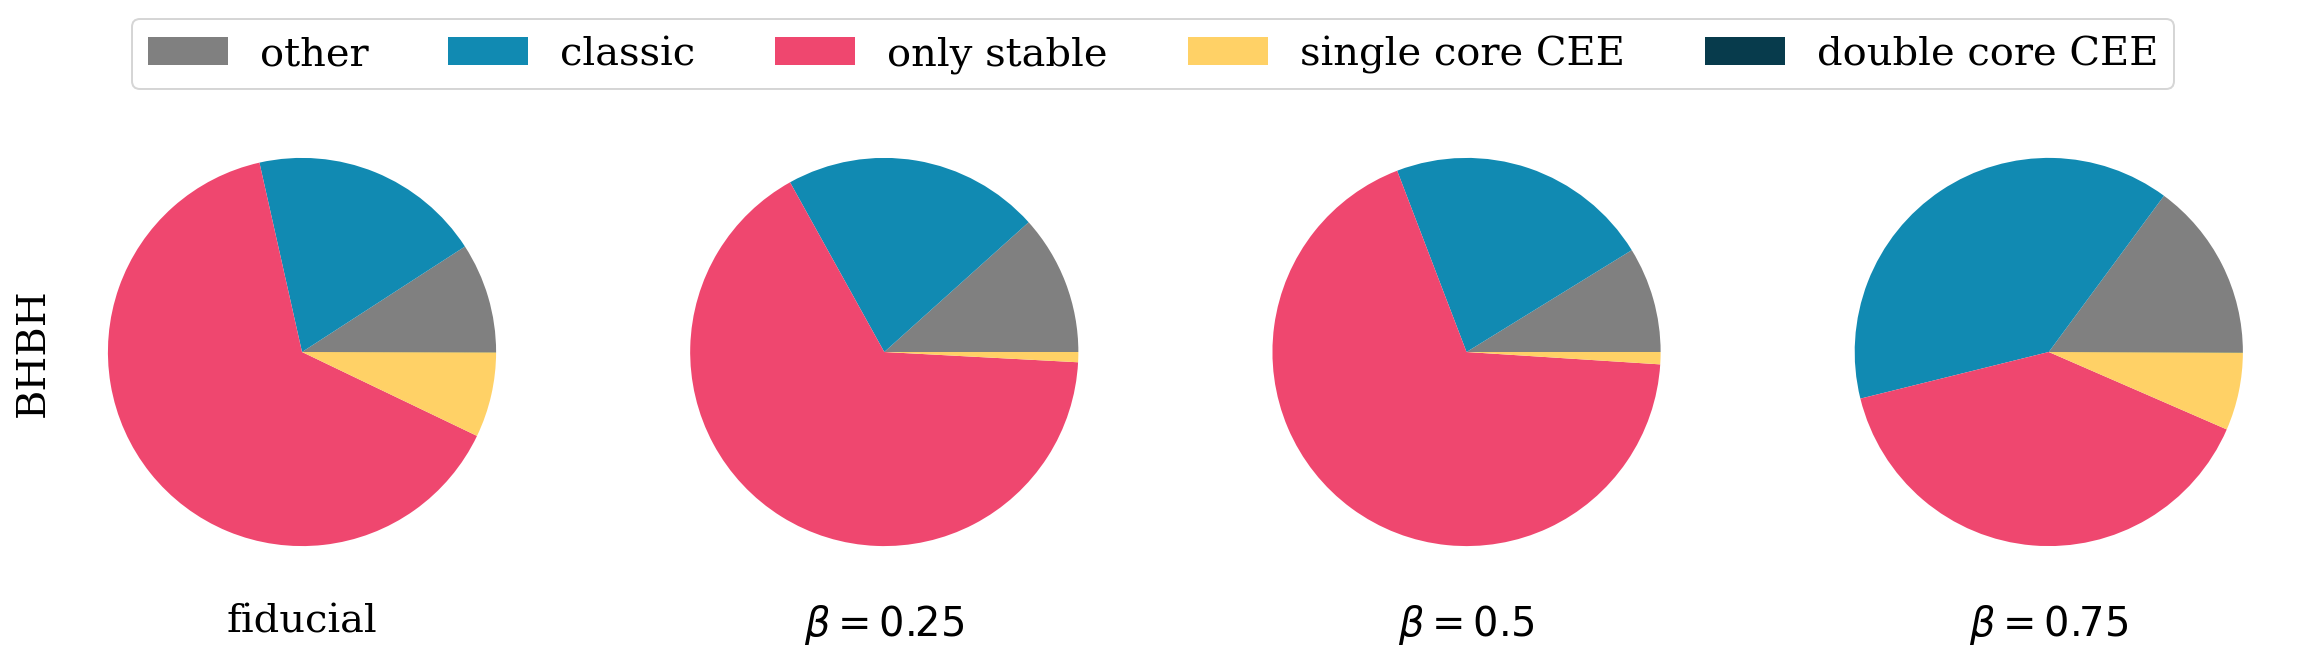

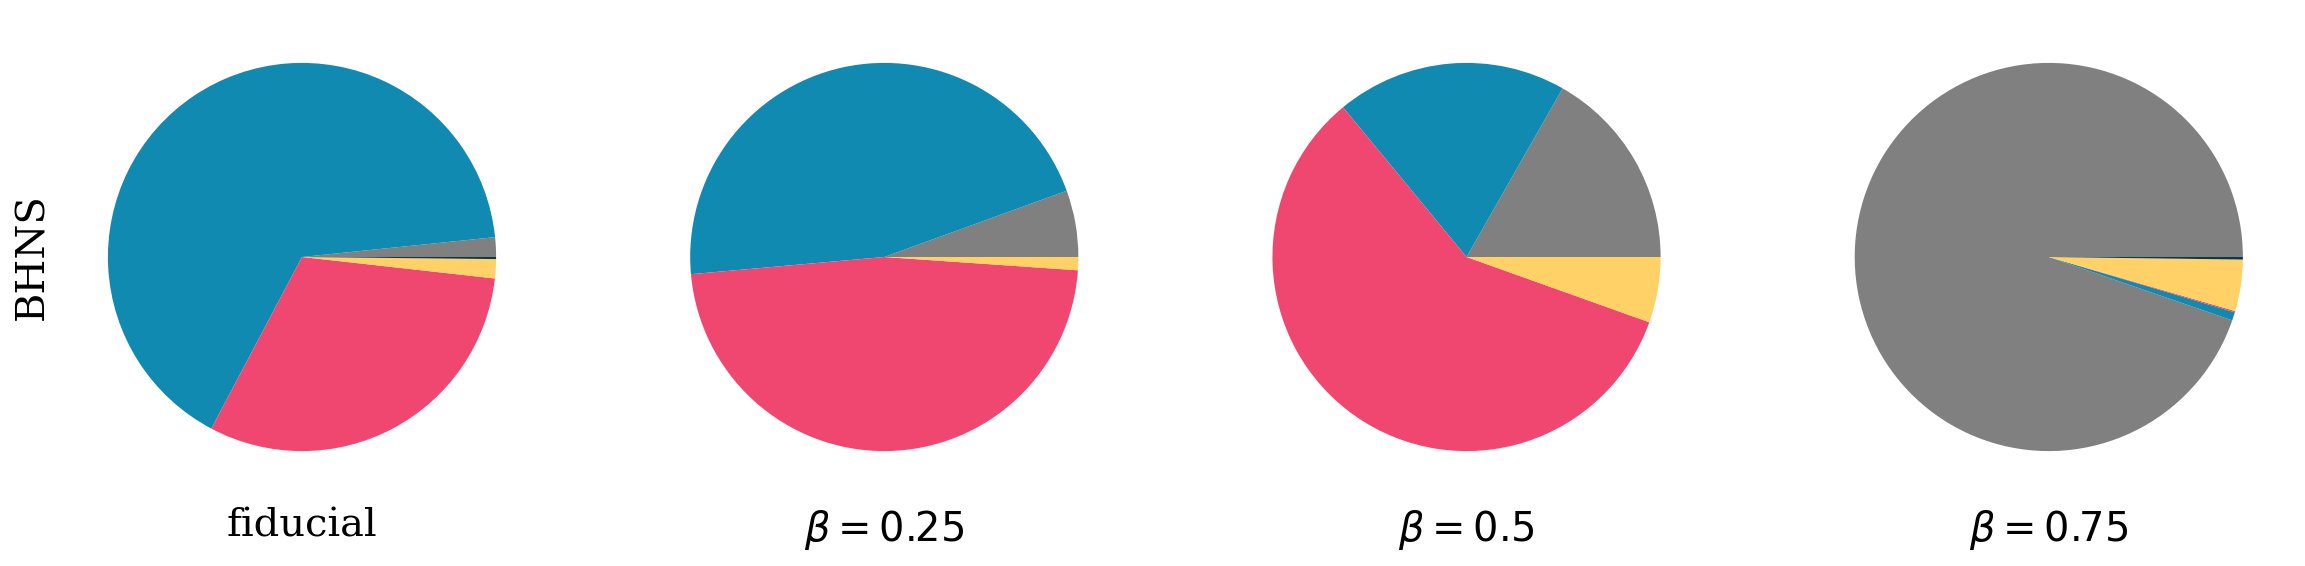

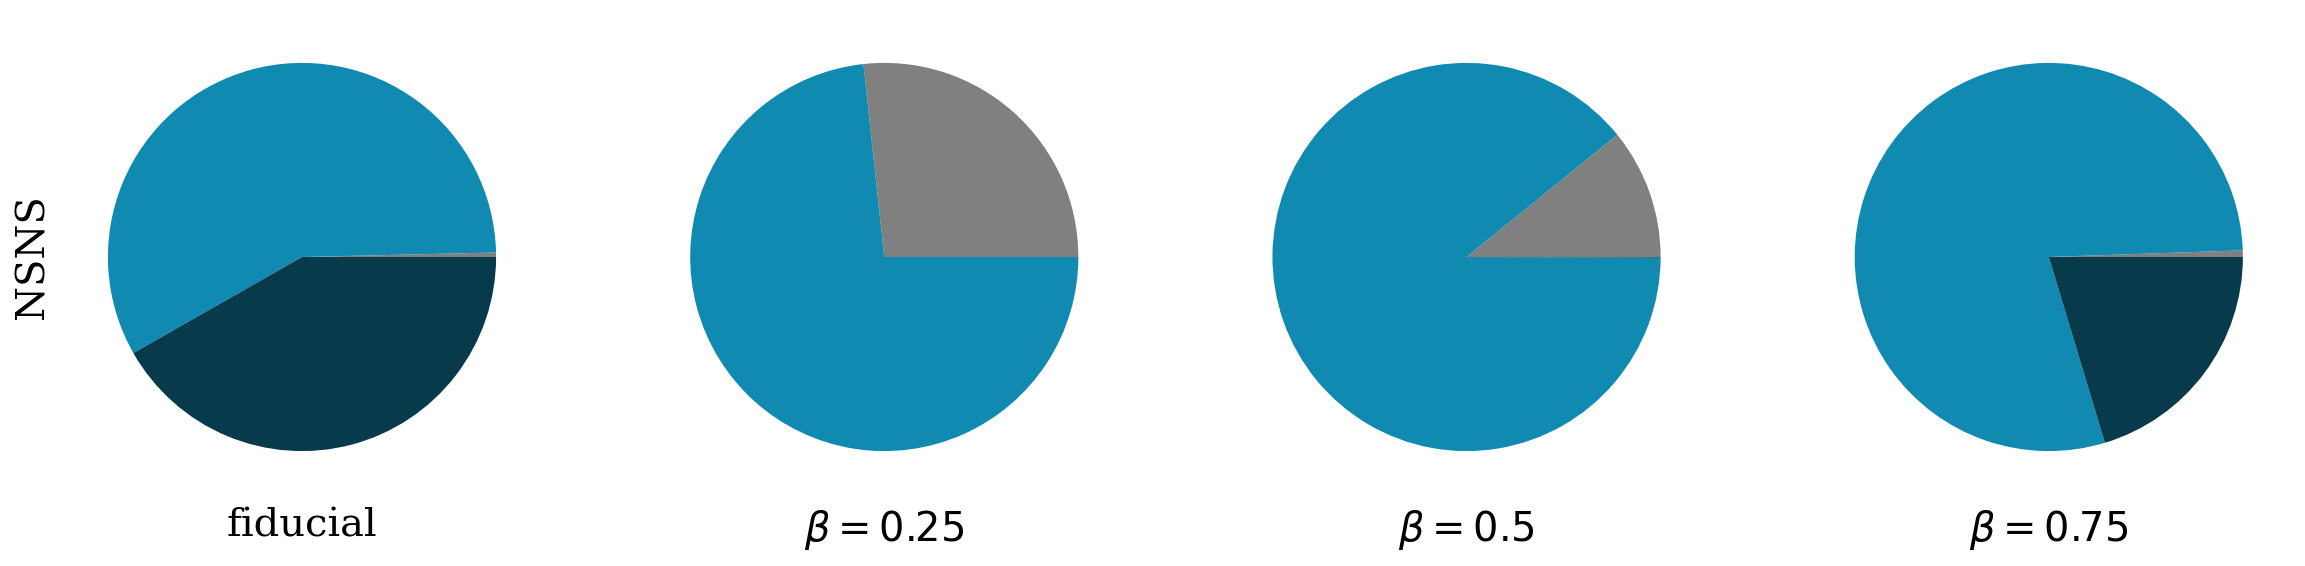

In [42]:
for dco_type in dco_types:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for v in range(4):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = [np.sum(data["weight"][data["channel"] == i]) for i in range(len(channel_colours))]
        axes[v].pie(fractions, colors=[channels[c]["colour"] for c in range(len(channels))],
                    labels=[channels[c]["label"] for c in range(len(channels))], labeldistance=None)
        axes[v].set_xlabel(variations[v]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

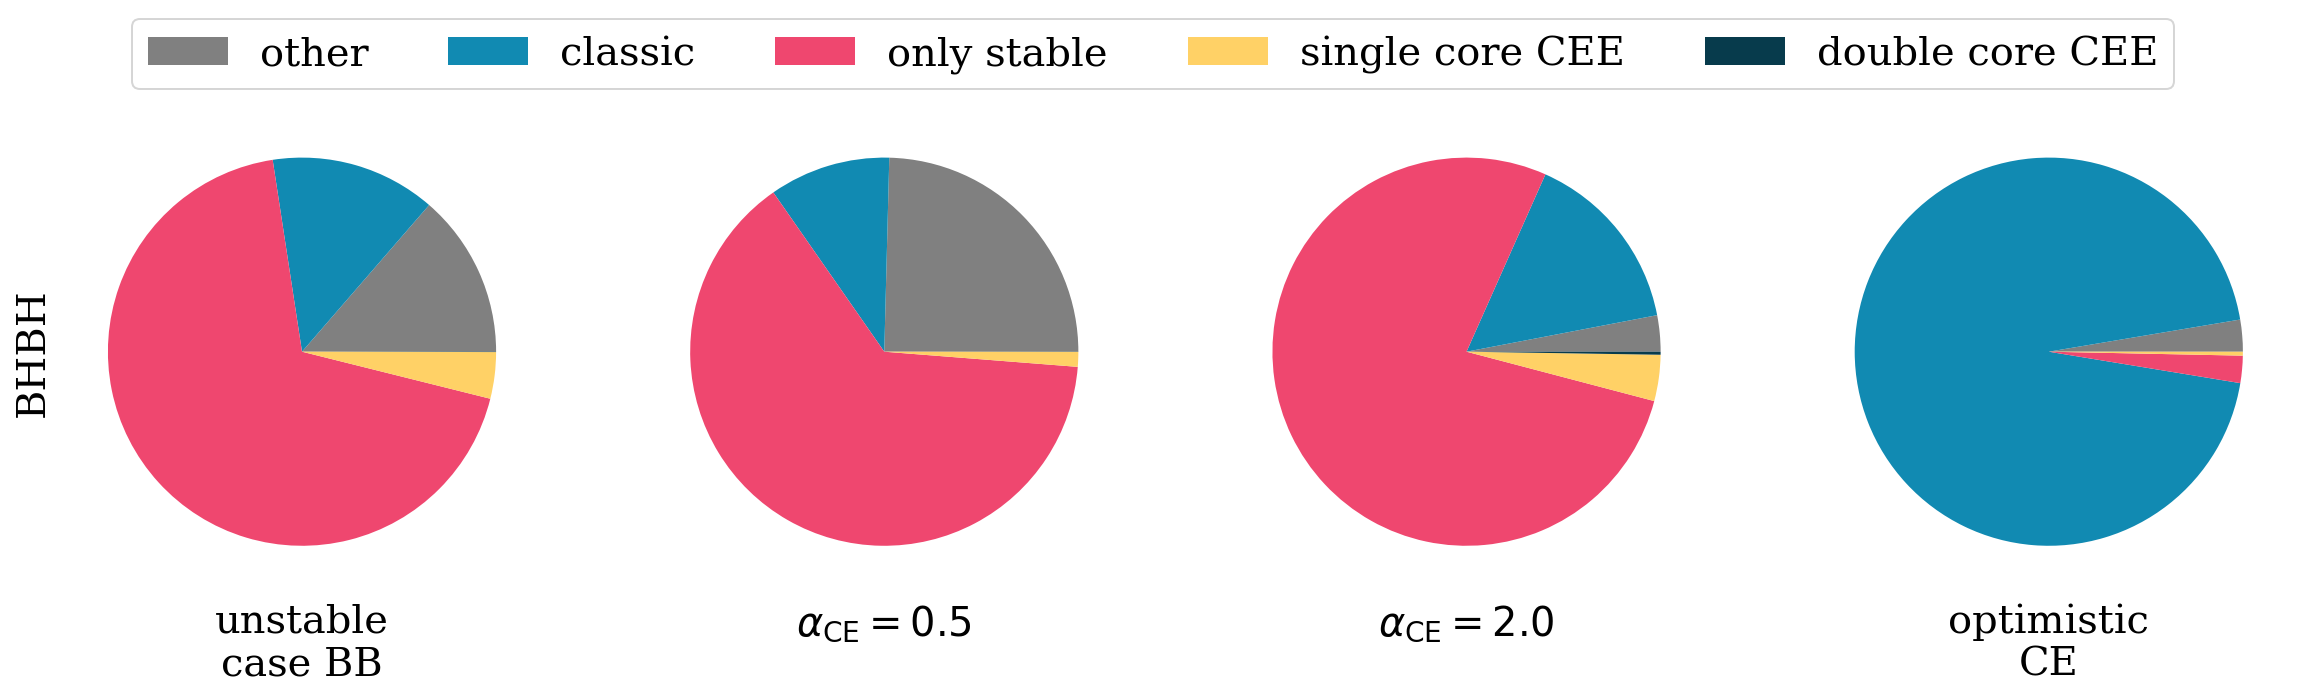

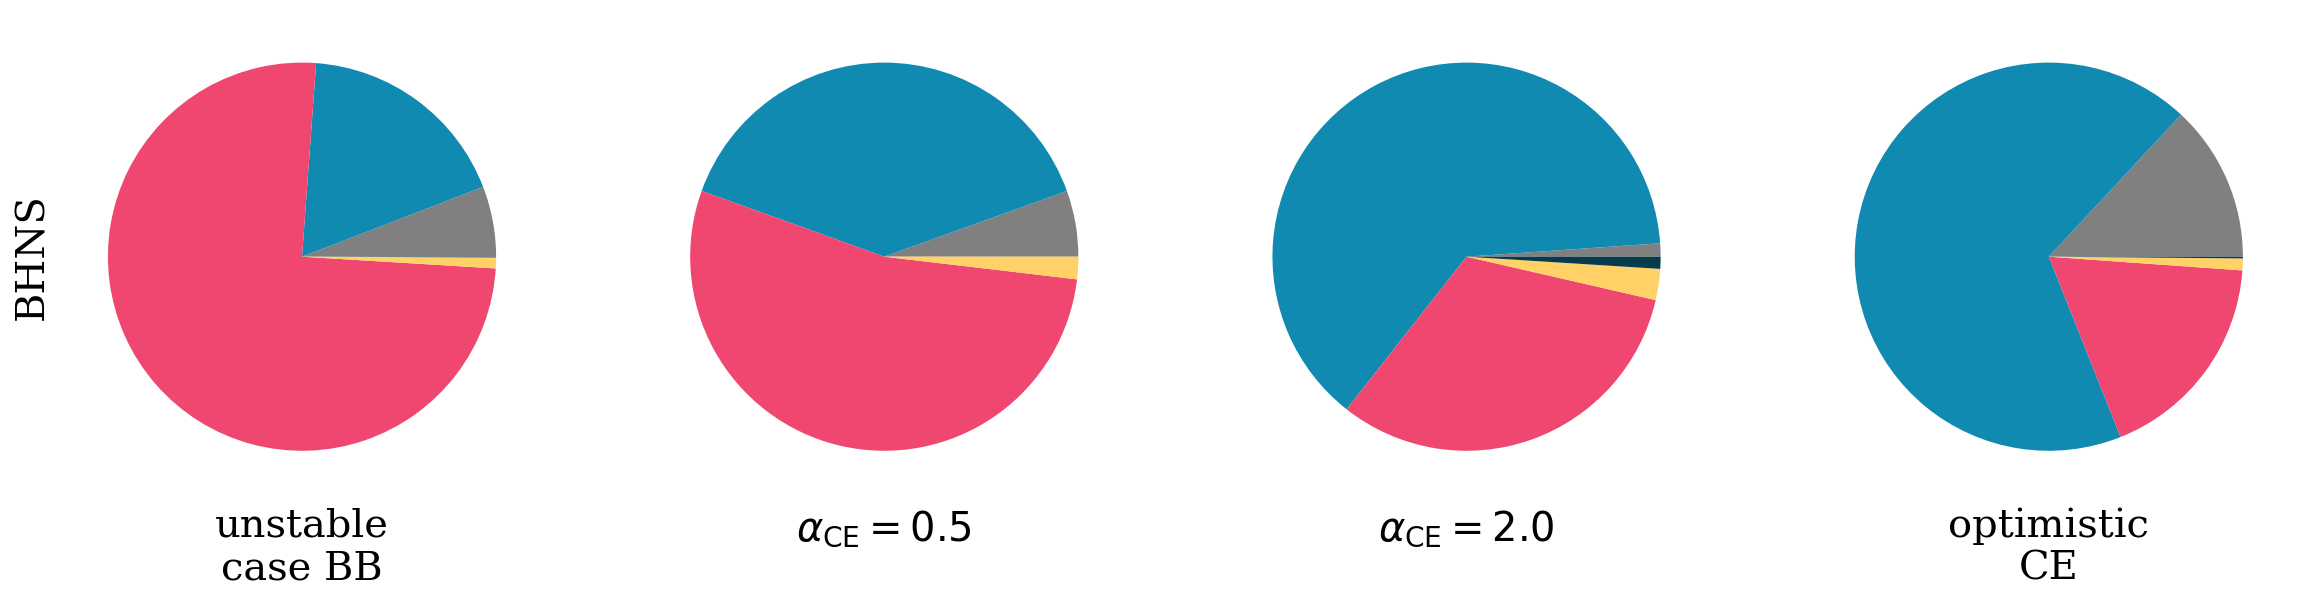

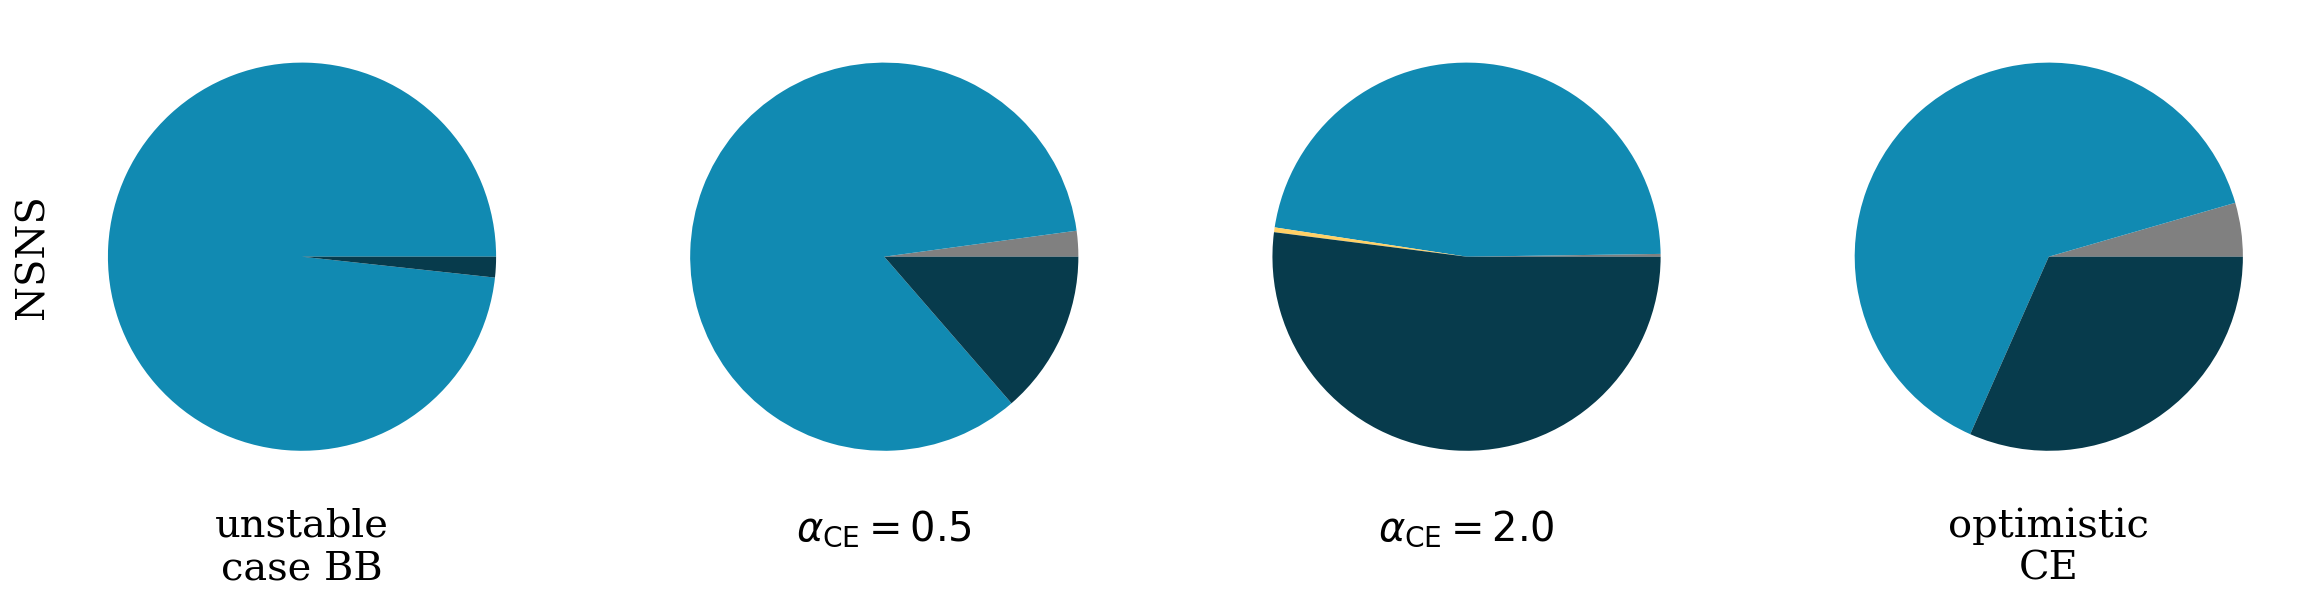

In [44]:
for dco_type in dco_types:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for v in range(4, 8):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = [np.sum(data["weight"][data["channel"] == i]) for i in range(len(channel_colours))]
        axes[v - 4].pie(fractions, colors=[channels[c]["colour"] for c in range(len(channels))],
                    labels=[channels[c]["label"] for c in range(len(channels))], labeldistance=None)
        axes[v - 4].set_xlabel(variations[v]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

In [ ]:
def channel_percentages(channel, weights):
    